<a href="https://colab.research.google.com/github/cici31/Portfolio/blob/main/EDA_ramen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#importing beberapa paket yang penting
import numpy as np #linear aljabar
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
%matplotlib inline

In [71]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ramen-ratings.csv') #mengambil data
data.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [72]:
#checking total baris dan kolom yang ada
data.shape

(2580, 7)

terdapat 7 kolom 

In [73]:
#check apakah ada data yang kurang lengkap
data.isna().sum()

Review #       0
Brand          0
Variety        0
Style          2
Country        0
Stars          0
Top Ten     2539
dtype: int64

berdasarkan kolom style terdapat data yang kurang lengkap atau kosong, maka kita akan hilangkan pada code dibawah

In [74]:
data = data.dropna(subset=['Style'])
print(data["Style"].isna().sum())

0


In [75]:
print(data['Variety'].unique())
print(data['Variety'].value_counts())
print(len(data["Variety"].unique()),'variasi makanan')

["T's Restaurant Tantanmen "
 'Noodles Spicy Hot Sesame Spicy Hot Sesame Guan-miao Noodles'
 'Cup Noodles Chicken Vegetable' ...
 'Hu Tiu Nam Vang ["Phnom Penh" style] Asian Style Instant\xa0Rice\xa0Noodles'
 'Oriental Style Instant Noodles' 'Tom Yum Chili Flavor']
Beef                                 7
Chicken                              7
Yakisoba                             6
Artificial Chicken                   6
Vegetable                            6
                                    ..
Jah Jan Men                          1
Oh! Ricey Pho Ga                     1
Veggie Noodle Black Sesame Noodle    1
Nuudeli Liha Nudlar Kott             1
Tom Yum Chili Flavor                 1
Name: Variety, Length: 2411, dtype: int64
2411 variasi makanan


berdasarkan kolom variety, ternyata ramen memiliki saat ini memiliki 2411 variasi dan variasi beef dan chicken merupakan yang terbanyak

In [76]:
print(data['Style'].unique())
print(data['Style'].value_counts())

['Cup' 'Pack' 'Tray' 'Bowl' 'Box' 'Can' 'Bar']
Pack    1531
Bowl     481
Cup      450
Tray     108
Box        6
Can        1
Bar        1
Name: Style, dtype: int64


kemasan tipe pack saat ini banyak digunakan brand sebagai kemasan, terbukti dengan beberapa ramen instan yang tersebar di beberapa supermarket 

In [77]:
print(data["Country"].unique())
print(data['Country'].value_counts())
print(len(data["Country"].unique()), 'Negara')

['Japan' 'Taiwan' 'USA' 'India' 'South Korea' 'Singapore' 'Thailand'
 'Hong Kong' 'Vietnam' 'Ghana' 'Malaysia' 'Indonesia' 'China' 'Nigeria'
 'Germany' 'Hungary' 'Mexico' 'Fiji' 'Australia' 'Pakistan' 'Bangladesh'
 'Canada' 'Nepal' 'Brazil' 'UK' 'Myanmar' 'Netherlands' 'United States'
 'Cambodia' 'Finland' 'Sarawak' 'Philippines' 'Sweden' 'Colombia'
 'Estonia' 'Holland' 'Poland' 'Dubai']
Japan            352
USA              323
South Korea      309
Taiwan           223
Thailand         191
China            168
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4


tersebar di 38 negara namun jepang dan USA merupakan konsumen terbesar

In [78]:
#menghitung ada berapa brand yang ada
print(len(data['Brand'].unique()))

355


In [120]:
data['Brand'].value_counts()[:10]

Nissin           381
Nongshim          98
Maruchan          76
Mama              71
Paldo             66
Myojo             63
Indomie           53
Samyang Foods     51
Ottogi            45
Vina Acecook      34
Name: Brand, dtype: int64

dari 355 brand, top 10 brand yang memilki variasi terbanyak salah satunya indomie berada pada urutan ke-7

In [79]:
#check apakah ada data yang kosong atau data yang aneh
for s in data['Stars']:
    try:
        s = float(s)
    except:
        print(s)

Unrated
Unrated
Unrated


berikut ini bertujuan untuk melakukan pengurutan berdasarkan rating

In [80]:
#terdapat data yang tidak memiliki rating, maka kita hilangkan saja
data = data[data['Stars'] != 'Unrated']
print(data[data['Stars'] == 'Unrated']['Stars'].sum())

0


In [121]:
variasi = list(data['Variety'].unique())
hitung = [0.0]*2411
variasi_h = dict(zip(variasi, hitung)) #mengubah ke dictionary untuk menghitung  ratings

for varian in variasi:
    varian_data = data[data['Variety'] == varian]
    for star in varian_data['Stars']:
        variasi_h[varian] += float(star) #hitung rating
    variasi_h[varian] /= len(varian_data) #hitung rata-rata

In [122]:
top30ratings = [] #list untuk meyimpan hasil
for key, values in variasi_h.items():
    top30ratings.append([key,values])

top30ratings = sorted(top30ratings, key = lambda x : x[1], reverse = True) #sortir berdasarkan descending order
top30ratings
for i in range(30):
    print('#{:<4}{:65} {}'.format(i+1, top30ratings[i][0], round(top30ratings[i][1],2)))

#1   Creamy tom Yum Kung Flavour                                       5.0
#2   Yokohama Tonkotsu Shoyu                                           5.0
#3   Demae Ramen Bar Noodle Aka Tonkotsu Flavour Instant Noodle        5.0
#4   Tokyo Shoyu Ramen                                                 5.0
#5   Beef Ramen                                                        5.0
#6   Creamy Soup With Crushed Noodles Hot & Sour Fish Flavor           5.0
#7   Penang White Curry Rice Vermicelli Soup                           5.0
#8   Paegaejang Ramen                                                  5.0
#9   Instant Noodles Laksa Singapura Flavour                           5.0
#10  Cup Noodles Very Veggie Spicy Chicken Flavor Ramen Noodle Soup    5.0
#11  Cup Noodles Very Veggie Beef Flavor Ramen Noodle Soup             5.0
#12  Cup NoodlesTom Yam Seafood (More Shrimptacular)                   5.0
#13  Cup Noodles Very Veggie Chicken Flavor Ramen Noodle Soup          5.0
#14  Juzz's Mee Creamy Ch

Data di atas meruapakan hasil top 30 variasi ramen berdasarkan rating tertinggi

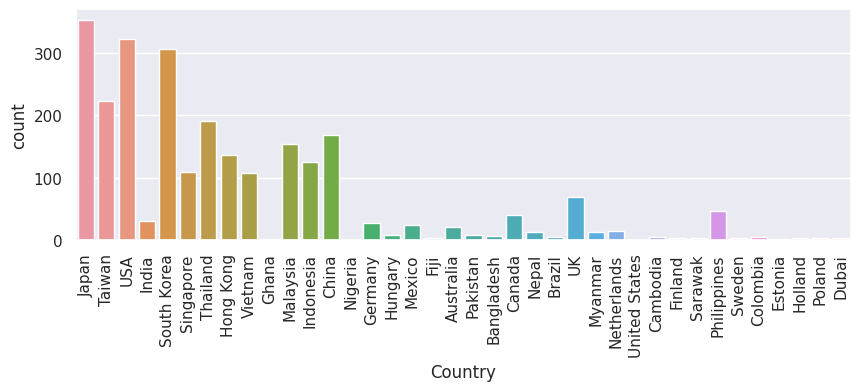

In [117]:
sns.set(style = 'darkgrid')
f, ax = plt.subplots(1,1,figsize = (10,3))
sns.countplot(x = 'Country', data = data)
plt.xticks(rotation=90)
plt.show()

Japan, USA dan South Korea merupakan konsumen terbesar saat ini

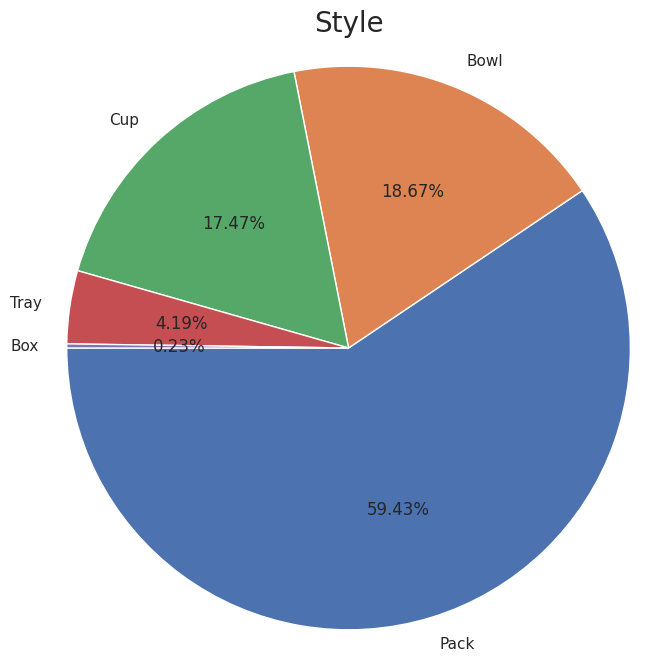

In [118]:
labels = 'Pack', 'Bowl', 'Cup' , 'Tray', 'Box' #We can't include 'Bar' and 'Can' because they only appear once in our data.
size = [1531, 481, 450, 108, 6]

f, ax = plt.subplots(1,1, figsize= (8,8))

ax.pie(size, labels = labels, autopct = '%1.2f%%', startangle = 180)
ax.axis('equal')
ax.set_title("Style", size = 20)

plt.show()

Kesimpulan:
Ramen memiliki pasar yang besar atas 3 negara yaitu Japan, USA dan South Korea. meskipun demikian brand indomie yang berasal dari indonesia berada pada urutan ke-7 berdasarkan variasi produk terbanyak dari beberapa brand di beberapa negara.

berdasarkan top 30 variasi ramen, beef dan chicken merupakan variasi yang terbanyak hal ini mungkin saja peminat variasi ini sangat banyak. selain itu   Creamy tom Yum Kung Flavour dan Yokohama Tonkotsu Shoyu meruapakan 2 variasi ramen dengan rating tertinggi.

saat ini konsumen lebih menyukai kemasan Pack, Bowl dan Cup. informasi ini bisa digunakan untuk produsen dalam menggunakan jenis kemasan.